<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_isco3/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04_RandomForestRegressorによる回帰モデルの学習・評価
- 「データ前処理」で保存したデータを読み込み、RandomForestRegressorでモデルを学習・評価してみましょう。

---

### 🌐 参考サイト
#### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

---
---

### ⬇️ ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install matplotlib-fontja

### 📁 GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ➜]　ライブラリのimport

In [1]:
import numpy as np # 数値演算ライブラリ
import pandas as pd # データ分析ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # 可視化ライブラリ
import joblib # モデル保存・読み込みライブラリ
from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import linear_model # scikit-learnのlinear_modelライブラリ
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor (回帰モデル)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 回帰モデルの性能評価用関数

### ✍️ 定数の定義
- データファイルパスを定義しておきます
- データ読み込み・データ書き込みの際に使用してください。修正は不要です

In [2]:
# 前処理後の出力ファイルパス定義
TIPS_PREPROCESSED_CSV = "./data/tips_preprocessed.csv"
MEDICAL_PREPROCESSED_CSV = "./data/medical_preprocessed.csv"

# RANDOM SEED 定義
RANDOM_SEED = 0

---
---
---

### ✎ サンプルプログラム10　RandomForestRegressorによる回帰モデルの学習

以下の手順で、チップ額の回帰モデルを学習します。
- 前処理済みのチップ額データセットをDataFrameに読み込む(TIPS_PREPROCESSED_CSVで定義済みのファイル名を使用する)
- 訓練データとテストデータに分割する
- RandomForestRegressorを用いて回帰モデルを学習する

In [3]:
# 前処理済みのデータセットを読み込む
df_tips = pd.read_csv(TIPS_PREPROCESSED_CSV, index_col=0) # 0番の列をindexに使用するため、index_col=0を指定します

# 説明変数と目的変数に分ける
X_tips = df_tips.iloc[:,:-1]
y_tips = df_tips.iloc[:,-1]

# 訓練データとテストデータに分割する
X_train_tips, X_test_tips, y_train_tips, y_test_tips = train_test_split(X_tips, y_tips, test_size=0.3, random_state=RANDOM_SEED)

In [4]:
# RandomForestRegressorで学習させる
rf_model_tips = RandomForestRegressor(max_depth=3)    # 回帰モデルを作る
rf_model_tips.fit(X_train_tips, y_train_tips)    # 訓練する

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

---

### ∿ 練習プログラム10　RandomForestRegressorによる回帰モデルの学習 (5点)

以下の手順で、医療保険料の回帰モデルを学習しましょう。  
1️⃣ 前処理済みの医療保険料データセットをDataFrameに読み込む(MEDICAL_PREPROCESSED_CSVで定義済みのファイル名を使用する)  
2️⃣ 訓練データとテストデータに分割する  
3️⃣ RandomForestRegressorを用いて回帰モデルを学習する  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

In [ ]:
# 前処理済みの医療保険料データセットを読み込む

# 説明変数と目的変数に分ける

# 訓練データとテストデータに分割する


In [ ]:
# RandomForestRegressorで学習


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [ ]:
#@title 送信処理用共通プログラム（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown 解答の送信に必要です。（中身は絶対に修正しないでください）

import os
os.makedirs(".client/python", exist_ok=True)  # 隠しフォルダを作成
!wget -q https://raw.githubusercontent.com/YasuharuSuzuki/25_isco3/main/91_notebook_client/src/setup.sh -O .client/setup.sh   # 外部コードをダウンロードして隠しフォルダに配置
!chmod +x ./.client/setup.sh
!bash ./.client/setup.sh # 実行

# モジュールの初期化
exec(open('.client/client_setup.py').read())

# ノートブック固有の設定
NOTEBOOK_PATH = "05_機械学習(回帰)/04_RandomForestRegressorによる回帰モデルの学習・評価.ipynb"
set_notebook_config(NOTEBOOK_PATH)

In [ ]:
#@title 問10 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=10, button_name="練習プログラム"))

---
---
---

### 🩺 サンプルプログラム11 エラーレートと決定係数によるモデルの評価

- エラーレートと決定係数を算出して、モデルを評価してみましょう。


In [9]:
# エラーレートと決定係数の算出を行うユーザー定義関数
def evaluate_metrics(y_train, y_test, y_train_pred, y_test_pred):
    # 学習時スコア
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_R2 = r2_score(y_train, y_train_pred)
    
    # テスト時スコア
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_R2 = r2_score(y_test, y_test_pred)
    
    print("学習時スコア(train score)")
    print("　平均絶対誤差: ", train_MAE)
    print("　平均二乗誤差: ", train_MSE)
    print("　二乗平均平方根誤差: ", train_RMSE)
    print("　決定係数R^2: ", train_R2)
    
    print("テストスコア(test score)")
    print("　平均絶対誤差: ", test_MAE)
    print("　平均二乗誤差: ", test_MSE)
    print("　二乗平均平方根誤差: ", test_RMSE)
    print("　決定係数R^2: ", test_R2)

In [10]:
y_train_tips_pred = rf_model_tips.predict(X_train_tips)  # 学習データを使って推論する
y_test_tips_pred = rf_model_tips.predict(X_test_tips)  # テストデータを使って推論する

# エラーレートと決定係数の算出を行うユーザー定義関数の呼び出し
evaluate_metrics(y_train_tips, y_test_tips, y_train_tips_pred, y_test_tips_pred)

学習時スコア(train score)
　平均絶対誤差:  0.5948650675245081
　平均二乗誤差:  0.6587393539721741
　二乗平均平方根誤差:  0.8116275956201675
　決定係数R^2:  0.6651008787352044
テストスコア(test score)
　平均絶対誤差:  0.7941939049874106
　平均二乗誤差:  1.1192743631325186
　二乗平均平方根誤差:  1.0579576376833424
　決定係数R^2:  0.39215115658813915


### 考察
- 学習時の R^2 は 0.667 と向上したのに対し、テスト時の R^2 は0.392 と 低下してしまった。
  - 明らかに過学習の傾向であり、チップ額に関してはLinearRegressionの方が適切であると考える。
- 平均絶対誤差（MAE）は学習時で約 0.594、テスト時で約 0.792、二乗平均平方根誤差（RMSE）も学習時で約 0.809、テスト時で約 1.05 と、学習データとテストデータの間で大きな差が見られる
  - 予測誤差の大きさから、n数を増やすことが難しければRandomForestRegressorのモデル開発は諦めても良いと考えられる。


---

### 🔎 練習プログラム11 エラーレートと決定係数によるモデルの評価 (5点)

1️⃣ 医療保険料の学習済み回帰モデルを使用して推論し、エラーレートと決定係数を確認してみましょう。  
  - ※定義済みの evaluate_metrics() 関数を呼び出しましょう。  

2️⃣ 考察も記載してみましょう。  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->
<!-- evaluate_metrics()ではエラーレートと決定係数の算出・print出力を行っています。 -->

In [ ]:
# 学習データを使って推論する
# テストデータを使って推論する

# エラーレートと決定係数の算出を行うユーザー定義関数の呼び出し

# 考察：こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。
# 指標名（MAE / RMSE / R^2）を明示し、具体的な数値を交えて、数値 → 解釈 → 結論の流れで記載してください。

学習時スコア(train score)
　平均絶対誤差:  2430.7908522106113
　平均二乗誤差:  18782589.43819234
　二乗平均平方根誤差:  4333.888489358297
　決定係数R^2:  0.8694406624062418
テストスコア(test score)
　平均絶対誤差:  2706.0672340897086
　平均二乗誤差:  23089674.513559688
　二乗平均平方根誤差:  4805.171642466031
　決定係数R^2:  0.8496138474823058


In [ ]:
#@title 問11 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=11, button_name="練習プログラム"))

---
---
---

### 🌘 サンプルプログラム12 残差の可視化

- 残差を可視化してみましょう

In [13]:
# 残差の可視化を行うユーザー定義関数
def residual_plot(y_column_name, y_train, y_test, y_train_pred, y_test_pred):
    df_train = pd.DataFrame(y_train)
    df_train['y_train_pred'] = y_train_pred
    
    df_test = pd.DataFrame(y_test)
    df_test['y_test_pred'] = y_test_pred
    
    ax = plt.gca()
    
    # 傾き1の直線を追加
    a_line=[min(df_train[y_column_name].min(), df_test[y_column_name].min()), max(df_train[y_column_name].max(), df_test[y_column_name].max())]
    sns.regplot(x=df_train[y_column_name], y=df_train['y_train_pred'],label='train')
    sns.regplot(x=df_test[y_column_name], y=df_test['y_test_pred'],label='test')
    sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1},label='residual 0')
    
    ax.set_xlabel('true')
    ax.set_ylabel('pred')
    
    plt.legend(fontsize=10)
    plt.show()

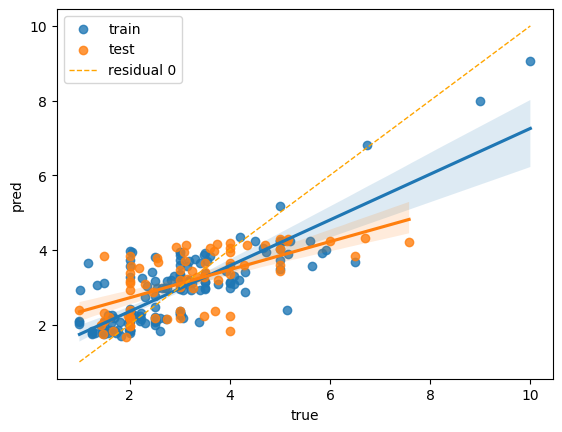

In [14]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot('tip', y_train_tips, y_test_tips, y_train_tips_pred, y_test_tips_pred)

### 考察
- LinearRegressionの時よりも学習時とテスト時で精度の落ち幅が大きくなっています。
- エラーレートと決定係数では数値で判断しておりましたが、残差plotからも過学習の傾向が伺えます。

---

### 🏟️ 練習プログラム12 残差の可視化 (5点)

1️⃣ 医療保険料について、残差を可視化してみましょう。  
  - ※定義済みの residual_plot() 関数を呼び出しましょう。  

2️⃣ 考察を記載してみましょう。  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->
<!-- residual_plot() では X軸を実際の値、y軸を予測値とし、残差0の直線を引いてどの程度実際の値と予測値でズレがあるのかを可視化しています   -->

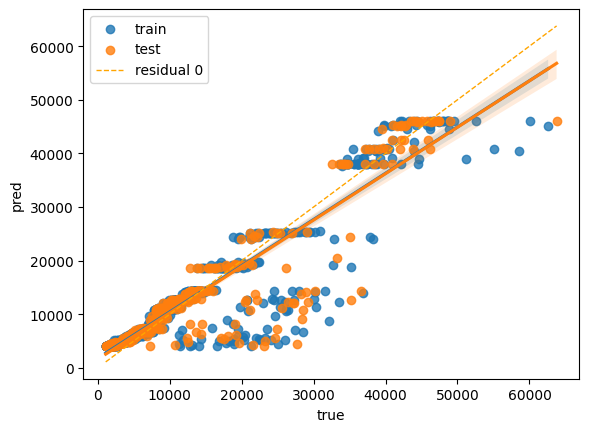

In [ ]:
# 残差の可視化を行うユーザー定義関数を呼び出す


# 考察：こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。

In [ ]:
#@title 問12 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=12, button_name="練習プログラム"))